In [205]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import cv2
from pathlib import Path

In [206]:
from IPython.display import display
from PIL import Image

def pic_show(img: np.ndarray):
    if len(img.shape) > 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img)
    display(pil_img)

In [207]:
from utils.utils import DATA_SET

ds_name = DATA_SET[7]
root = Path.cwd()
wd = root / ('data/train/' + ds_name)
img_dir = wd / '02'
seg_dir = wd / '02_ST/SEG'
tra_dir = wd / '02_GT/TRA'

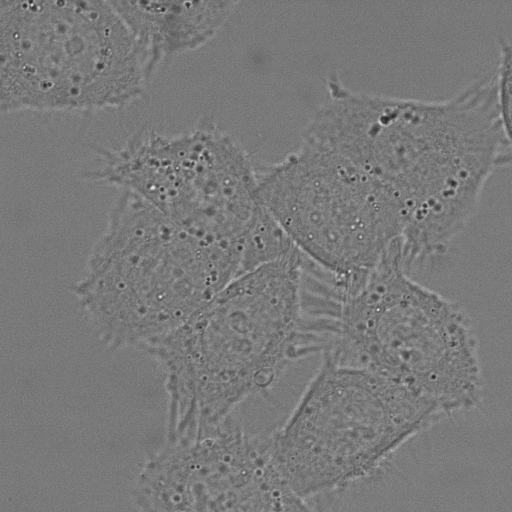

In [208]:
img_name = random.choice([f for f in img_dir.glob('*')])
seg_name = seg_dir / ('man_seg' + img_name.name[1:])
tra_name = tra_dir / ('man_track' + img_name.name[1:])
img = tifffile.imread(str(img_name))
seg = tifffile.imread(str(seg_name))
tra = tifffile.imread(str(tra_name))
seg_bin = 255 * np.uint8(seg > 0)
tra_bin = 255 * np.uint8(tra > 0)
# cv2.imshow('image', np.hstack((img, 255 * (mask / mask.max()))))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# im_list = [img, seg_bin, tra_bin]
# fig, axs = plt.subplots(1, len(im_list))
# for i in range(len(im_list)):
#     axs[i].imshow(im_list[i])
#     axs[i].set_xticks([])
#     axs[i].set_yticks([])
# plt.show()
pic_show(img)

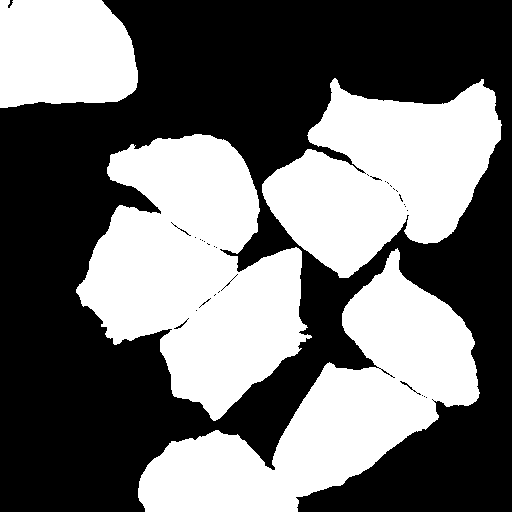

In [209]:
pic_show(seg_bin)

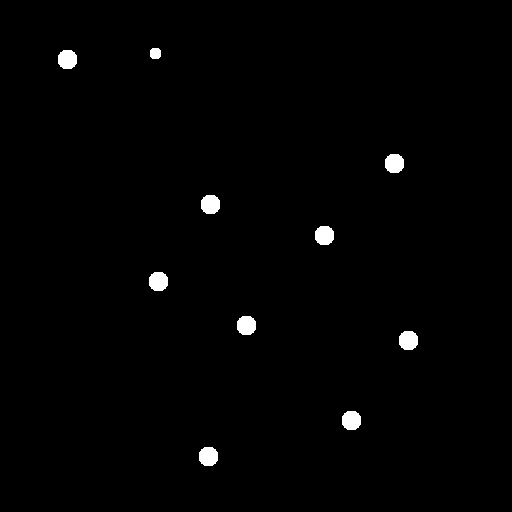

In [210]:
pic_show(tra_bin)

In [211]:
def stat(im):
    s = pd.Series(np.bincount(im.flatten()))
    return s[s != 0]
stat(tra)

0     259290
1        305
5        305
9        305
13       305
18       305
22       305
23       305
26       305
28       305
32       109
dtype: int64

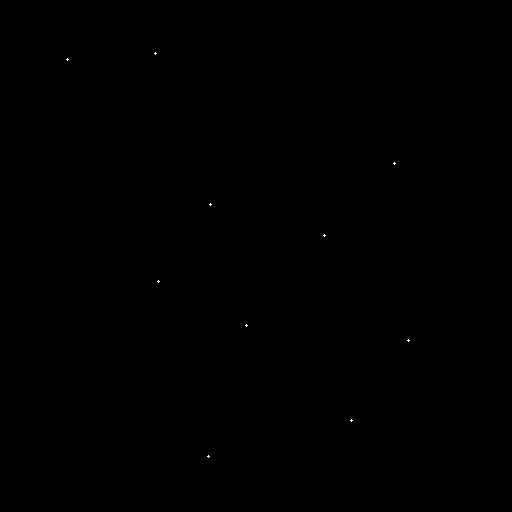

In [212]:
cnts, hier = cv2.findContours(tra_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
det_bin = np.zeros_like(tra_bin)
for cnt in cnts:
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
    else:
        while isinstance(cnt[0], np.ndarray):
            cnt = cnt[0]
        center = cnt
    cv2.circle(det_bin, center, 1, 255, -1)
pic_show(det_bin)

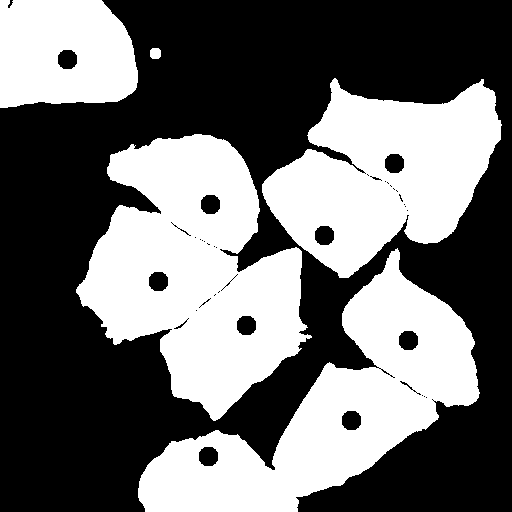

In [213]:
diff = cv2.absdiff(seg_bin, tra_bin)
pic_show(diff)

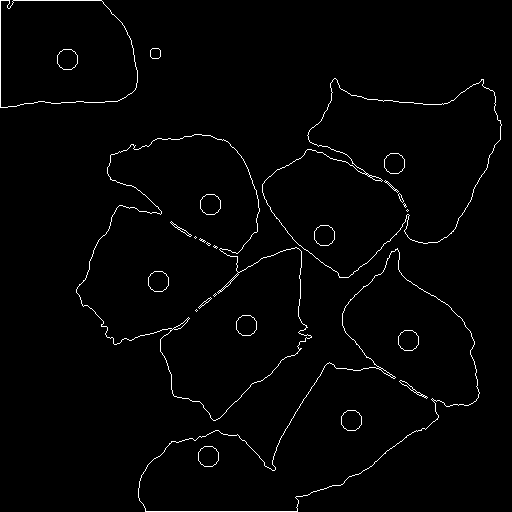

In [214]:
cnts, hier = cv2.findContours(diff, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
res = np.zeros_like(diff)
cv2.drawContours(res, cnts, -1, 255, 1)
pic_show(res)

In [215]:
hier = np.squeeze(hier)
hier

array([[17, -1,  1, -1],
       [ 2, -1, -1,  0],
       [ 3,  1, -1,  0],
       [ 4,  2, -1,  0],
       [ 5,  3, -1,  0],
       [ 6,  4, -1,  0],
       [ 7,  5, -1,  0],
       [ 8,  6, -1,  0],
       [ 9,  7, -1,  0],
       [10,  8, -1,  0],
       [11,  9, -1,  0],
       [12, 10, -1,  0],
       [13, 11, -1,  0],
       [14, 12, -1,  0],
       [15, 13, -1,  0],
       [16, 14, -1,  0],
       [-1, 15, -1,  0],
       [65,  0, 18, -1],
       [19, -1, -1, 17],
       [20, 18, -1, 17],
       [21, 19, -1, 17],
       [22, 20, -1, 17],
       [23, 21, -1, 17],
       [24, 22, -1, 17],
       [25, 23, -1, 17],
       [26, 24, -1, 17],
       [27, 25, -1, 17],
       [28, 26, -1, 17],
       [29, 27, -1, 17],
       [30, 28, -1, 17],
       [31, 29, -1, 17],
       [32, 30, -1, 17],
       [33, 31, -1, 17],
       [34, 32, -1, 17],
       [35, 33, -1, 17],
       [36, 34, -1, 17],
       [37, 35, -1, 17],
       [38, 36, -1, 17],
       [39, 37, -1, 17],
       [40, 38, -1, 17],


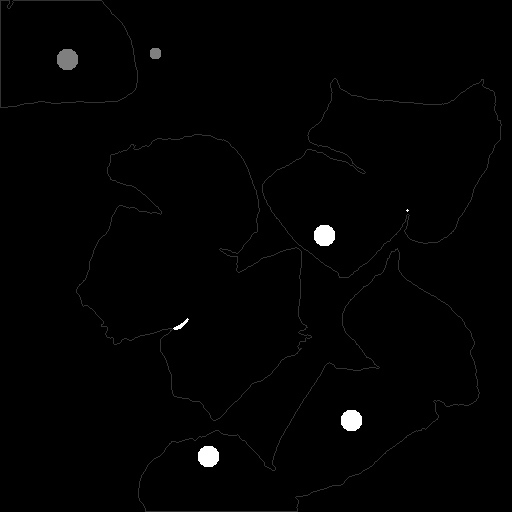

In [216]:
det_mask = np.zeros_like(diff)
seg_mask = np.zeros_like(diff)
for i in range(len(cnts)):
    first_child = hier[i, -2]
    parent = hier[i, -1]
    if first_child != -1:
        next_child = hier[first_child, 0]
        if next_child != -1:
            cv2.drawContours(det_mask, cnts, first_child, 255, -1)
            cv2.drawContours(det_mask, cnts, next_child, 255, -1)

            cv2.drawContours(seg_mask, cnts, i, 255, -1)
        else:
            cv2.drawContours(det_mask, cnts, first_child, 127, -1)

            cv2.drawContours(seg_mask, cnts, i, 127, -1)
        cv2.drawContours(det_mask, cnts, i, 50, 1)
    elif parent == -1:
        cv2.drawContours(det_mask, cnts, i, 127, -1)
pic_show(det_mask)

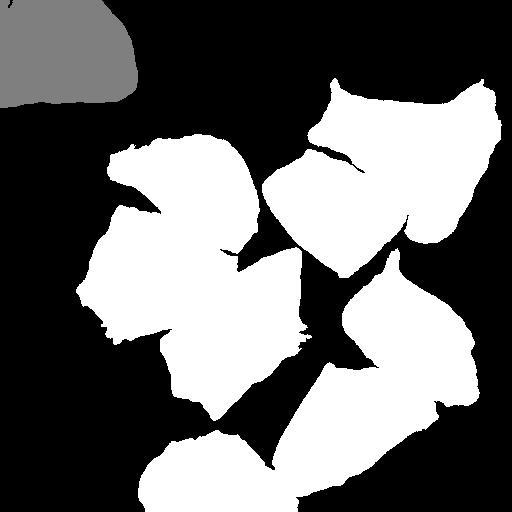

In [217]:
pic_show(seg_mask)

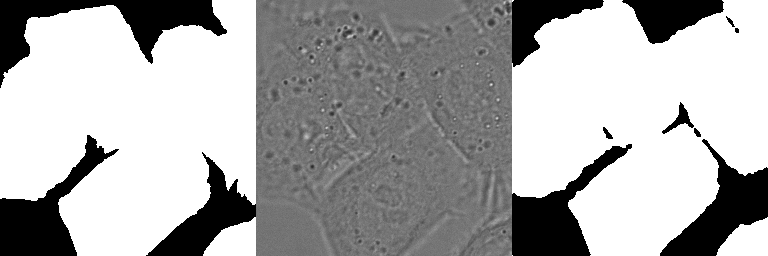

In [220]:
pred = cv2.imread(str(root / 'seg_ming.bmp'), -1)
pic_show(pred)